Intro to combining plots
========================

In this notebook you will learn how to combine plots in a simple way.

## Types of multiple plots

There are three ways of combining your plots in the visualization framework, each with its associated class:

- `"multiple"`: it's the most basic one. It just takes the drawinfs from all plots and displays them in the same plot.
- `"subplots"`: Creates a grid of subplots, where each item of the grid contains a plot.
- `"multiple_x"` and `"multiple_y"` (multiple_A): Creates a plot where a separate A axis is created for each plot, while the rest of axes are shared.
- `"animation"`: Creates an animation where each child plot is represented in a frame.

They can all be acheived with the `merge_plots` function.

In [1]:
from sisl.viz import merge_plots

Let's create a simple tight-binding model for *hBN* to experiment with it.

In [2]:
import sisl
import numpy as np

r = np.linspace(0, 3.5, 50)
f = np.exp(-r)

orb = sisl.AtomicOrbital("2pzZ", (r, f))
geom = sisl.geom.graphene(
    orthogonal=False, atoms=[sisl.Atom(5, orb), sisl.Atom(7, orb)]
)
geom = geom.move([0, 0, 5])
H = sisl.Hamiltonian(geom)
H.construct(
    [(0.1, 1.44), (0, -2.7)],
)
H[0, 0] = -0.7
H[1, 1] = 0.7

## Individual plots

As an example, from the hamiltonian that we constructed, let's build a bands plot and a pdos plot:

In [3]:
band_structure = sisl.BandStructure(
    H,
    [[0, 0, 0], [0, 0.5, 0], [1 / 3, 2 / 3, 0], [0, 0, 0]],
    400,
    [r"Gamma", r"M", r"K", r"Gamma"],
)
bands_plot = band_structure.plot()
pdos_plot = H.plot.pdos(
    data_Erange=[-10, 10], Erange=[-10, 10], kgrid=[121, 121, 1], nE=1000
).split_DOS(name="$species")

plots = [bands_plot, pdos_plot]

First, let's check the plots individually:

In [4]:
bands_plot

In [5]:
pdos_plot

INFO	Task(Task-2) nodify.node.140423730724496:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386160:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730710288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730386016:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543633584:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543632288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730717488:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730318848:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543437888:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543626432:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730411136:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543438368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730721808:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730714032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730322304:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543424256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730713264:node.py:get()- Evaluated because inputs changed.


And now, we will merge them.

Merging into a single plot
----

In [6]:
merge_plots(*plots)

INFO	Task(Task-2) nodify.node.140423730366752:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730317936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321536:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730320192:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730368000:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730381936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327200:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730373376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375680:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730328304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730323792:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730376592:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730372080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730377120:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730388032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378416:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327872:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730724496:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386160:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730710288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543633584:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543632288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730717488:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543437888:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543626432:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730411136:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543438368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730721808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730714032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730713264:node.py:get()- No need to evaluate


By default, `merge_plots` uses the `"multiple"` method to merge the plots. In this case, it is not very nice, because the two axes are different for bands and pdos.

However, they have one axis in common! The energy axis. We can use this fact to combine them in a way that they share the energy axis but have each a separate one for the other axis. 

Independent axes
-------------

First, we need to make sure that both energy axis are on the X or Y axis.

In [7]:
pdos_plot = pdos_plot.update_inputs(E_axis="y")
bands_plot = bands_plot.update_inputs(E_axis="y")

And then we can use `multiple_x` so that each plot has a separate X axis.

In [8]:
merge_plots(*plots, composite_method="multiple_x")

INFO	Task(Task-2) nodify.node.140423730366752:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730317936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321536:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730320192:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730378368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730368000:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730381936:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730370256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730327200:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730373376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370640:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375680:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730328304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730323792:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730376592:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730372080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730377120:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730388032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730322640:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730378416:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730327872:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730724496:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386160:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730710288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543633584:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543632288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730717488:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543437888:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543626432:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730411136:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543438368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730721808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730714032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730322304:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423543424256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730713264:node.py:get()- Evaluated because inputs changed.


Much better, right? Now we can easily see that B contributes more to the bottom band, while N contributes more to the top band.

Subplots
--------

Let's try now to use the `"subplots"` method.

In [9]:
merge_plots(*plots, composite_method="subplots")

INFO	Task(Task-2) nodify.node.140423730366752:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730317936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321536:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730320192:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730368000:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730381936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327200:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730373376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375680:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730328304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730323792:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730376592:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730372080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730377120:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730388032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378416:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327872:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730724496:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386160:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730710288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543633584:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543632288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730717488:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543437888:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543626432:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730411136:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543438368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730721808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730714032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730713264:node.py:get()- No need to evaluate


By default it puts one plot on each row, but we can manage that with the arguments `rows` (number of rows), `cols` (number of columns), and `arrange` (if rows or cols are missing, way to determine the missing value, can be "rows", "cols" or "square").

Let's put the two plots in separate columns:

INFO	Task(Task-2) nodify.node.140423730366752:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730317936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321536:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730320192:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730368000:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730381936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327200:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730373376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375680:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730328304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730323792:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730376592:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730372080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730377120:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730388032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378416:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327872:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730724496:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386160:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730710288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543633584:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543632288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730717488:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543437888:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543626432:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730411136:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543438368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730721808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730714032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730713264:node.py:get()- No need to evaluate


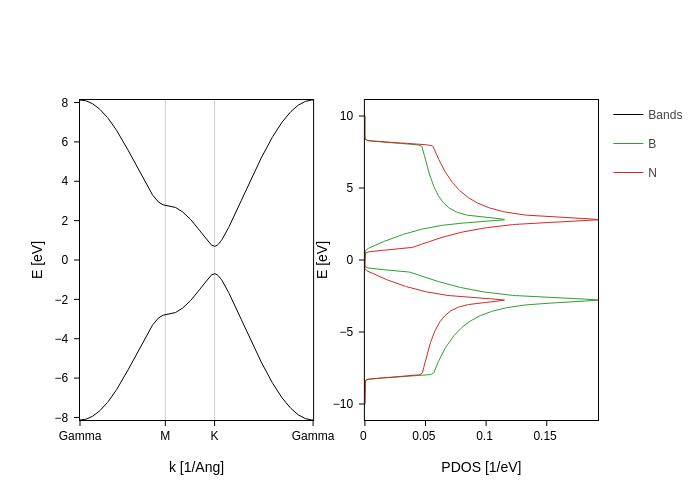

In [10]:
merge_plots(*plots, composite_method="subplots", cols=2).show("png")

<div class="alert alert-info">
    
Note
    
There is also the `sisl.viz.subplots` function, which might be more convenient to use in a notebook because its help message is more helpful.
    
</div>

Merging merged plots
-------------------

We can recursively merge plots. Unfortunately however, for the moment only the top level merge method is taken into account. The other levels are simply taken as `"multiple"`.

In [11]:
merged_plot = merge_plots(*plots, composite_method="multiple_x")

merge_plots(
    merged_plot, bands_plot, composite_method="subplots", cols=2, backend="plotly"
)

INFO	Task(Task-2) nodify.node.140423730366752:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730317936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321536:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730320192:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730368000:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730381936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327200:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730373376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375680:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730328304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730323792:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730376592:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730372080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730377120:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730388032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378416:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327872:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730724496:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386160:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730710288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730386016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730391920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730394848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543633584:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543632288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730717488:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318848:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543437888:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543626432:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730411136:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543438368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730721808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730722288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730714032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730713264:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730366752:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730317936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321536:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730320192:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378368:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730368000:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730381936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327200:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730373376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730370640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375968:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730375680:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730328304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543424448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730369776:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543435296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543430544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730325184:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730321440:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730371936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730318128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730323792:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730376592:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730372080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730377120:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423543433712:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730388032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730322640:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730378416:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730327872:node.py:get()- No need to evaluate


In the future, separate axes within subplots might be supported.

Animations
----------

Animations can be very cool but they are sometimes hard to build. `merge_plots` makes it as easy as possible for you, you just need to use the `"animation"` method.

Let's create an animation to see the convergence of graphene's PDOS with the number of k points. We first create the plots:

In [12]:
# Define the number of k points that we are going to try.
# Do 1 by 1 from 1 to 12 and then in steps of 5 from 15 to 90.
ks = [*np.arange(1, 12), *np.arange(15, 90, 5)]

# Generate all plots.
# We use the scatter trace instead of a line because it looks better in animations :)
pdos_plots = [
    H.plot.pdos(
        data_Erange=[-10, 10],
        Erange=[-10, 10],
        kgrid=[k, k, 1],
        nE=1000,
        line_mode="scatter",
        line_scale=2,
    ).split_DOS(name="$species")
    for k in ks
]

INFO	Task(Task-2) nodify.node.140423901351376:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900471008:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900464672:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730866912:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901434976:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899787680:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901432288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899514832:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899515648:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901445296:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901443808:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899525536:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899522656:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901847264:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899526832:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899863456:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899912176:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899918704:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899910256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899996448:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899998992:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899521936:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900002016:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900059920:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899525680:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900069856:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900152656:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899519632:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900163024:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900163840:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901434592:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900175664:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900169760:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900003312:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899912800:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900182192:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899785952:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900176096:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901362176:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900168112:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900273248:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900389232:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899988048:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900395232:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898416912:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900275600:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900388128:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898428960:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900162256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900393600:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898470864:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901841696:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899994912:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899776544:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898468896:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900174944:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899525344:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901432096:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898712544:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898478256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898480080:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898603232:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898608032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898607984:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899520736:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898672128:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900275984:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900184112:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898465824:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898724112:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899870944:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898664688:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898818816:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899014032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899007360:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898719792:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899018976:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898596896:node.py:get()- Evaluated because inputs changed.


Now all the heavy computation is done! We can merge the plots into an animation, using the ks as frame names. Other arguments that you can pass to an animation are `frame_duration` (in ms), `transition` (in ms) and `redraw` (Wether to redraw the whole plot for each frame).

<div class="alert alert-info">
    
Note
    
We suggest that you go to the last frame and click the house icon to set the y axis range. Then press play and see the PDOS converge!
    
</div>

In [13]:
merge_plots(*pdos_plots, composite_method="animation", frame_names=ks)

INFO	Task(Task-2) nodify.node.140423899782304:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901351376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900471008:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901363712:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899778368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901357424:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901351376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900471008:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900464672:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899778800:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899783168:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899779472:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901844864:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901010816:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899780096:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901844864:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899780336:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899780192:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730380768:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901844864:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901850576:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899779760:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899780384:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423904729408:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899790512:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730866912:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901434976:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901363184:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901349360:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901363040:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730866912:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901434976:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899787680:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899787488:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899788112:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901441984:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899789840:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899776736:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901441552:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899789840:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901439920:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901439776:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899787824:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899789840:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899776016:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899786192:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901444144:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901442704:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899513584:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901432288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899514832:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901443904:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899515024:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901439536:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901432288:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899514832:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899515648:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899515408:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899513344:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899516080:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899786384:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899516944:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899516752:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899786384:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899517520:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899516848:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899788832:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899786384:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899786000:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899516464:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899518480:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901442368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901841552:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901445296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901443808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901446064:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899524336:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901442176:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901445296:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901443808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899525536:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899858512:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899522224:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899859040:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899523904:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899526784:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901361984:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899523904:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901434832:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423902285840:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899513248:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899523904:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423730368288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730372368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899860624:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899861248:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899871664:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899522656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901847264:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899528704:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899786672:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899523280:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899522656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901847264:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899526832:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899873152:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899869072:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899906656:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899788976:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899863936:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899907184:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899788976:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899908000:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899907376:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899871232:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899788976:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899907424:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899869264:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899908912:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899909392:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899916736:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899863456:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899912176:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899869312:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899918032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899863600:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899863456:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899912176:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899918704:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899783072:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899916640:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899919088:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899522080:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899919856:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899919808:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899522080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899920288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899910736:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899911840:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899522080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899520400:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899919472:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899921392:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899921632:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899994816:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899910256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899996448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899780624:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899998464:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899911984:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899910256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899996448:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899998992:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899998752:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899997648:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899999280:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899866480:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901438912:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899912896:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899866480:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899999712:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901443856:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901432144:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899866480:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901430944:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899912272:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901352816:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899912512:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900056416:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899521936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900002016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899523616:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900059296:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899528224:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899521936:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900002016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900059920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900059680:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900057280:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899912464:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899996304:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900060976:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900060784:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899996304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900061408:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900002976:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899990832:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899996304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900061024:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900060496:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900062512:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900062848:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900066736:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899525680:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900069856:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901444960:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900152032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901442848:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899525680:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900069856:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900152656:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900152368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900063952:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900153088:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899871808:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900153856:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900153664:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899871808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900154432:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900153760:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900067840:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899871808:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900153808:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900065872:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900155536:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899869504:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900160384:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899519632:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900163024:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899519440:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900163216:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899527552:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899519632:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900163024:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900163840:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900163552:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900161968:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900164128:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899995488:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901016576:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901014416:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899995488:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900161008:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899526448:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900157648:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899995488:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899915632:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900164608:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900166144:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900166624:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900170048:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901434592:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900175664:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901360400:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900170720:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900466256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901434592:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900175664:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900169760:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900468224:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900168608:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900176288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900067312:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900169952:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900176672:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900067312:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900177344:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900176816:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899989536:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900067312:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900176864:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900169712:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900176720:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899911504:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900183872:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900003312:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899912800:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899989776:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899528752:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899998080:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900003312:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899912800:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900182192:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900180896:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900181280:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900174608:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899528080:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900182336:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900171776:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899528080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900270704:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900270272:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900181520:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899528080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900179216:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900270032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900271568:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899527696:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900276368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899785952:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900176096:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901357472:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900279008:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899785904:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899785952:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900176096:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901362176:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899775872:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900275360:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900157744:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900172304:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900280448:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900280256:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900172304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900281024:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900280352:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900180128:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900172304:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901359056:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900279968:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900280400:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900171008:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900388464:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900168112:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900273248:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900157456:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900274400:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900159664:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900168112:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900273248:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900389232:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900388512:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900385200:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900389616:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900180176:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900158848:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900270080:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900180176:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900390384:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900390144:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899912128:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900180176:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900274064:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900272720:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900390288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900156592:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900167152:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899988048:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900395232:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900179552:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898416336:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730392784:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899988048:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900395232:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898416912:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898416624:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900381840:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900159376:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901445344:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898418112:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898417920:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901445344:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898418688:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900066352:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900393744:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901445344:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898418160:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898417632:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898419696:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900271952:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898424112:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900275600:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900388128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900277904:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898428384:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900282368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900275600:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900388128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898428960:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898428672:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898421568:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898429488:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899996544:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900388224:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898430016:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899996544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898430592:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898420656:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900388560:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899996544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898429920:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898429680:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898429968:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900273824:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898467312:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900162256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900393600:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900181904:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898470480:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900160096:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900162256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900393600:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898470864:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899911168:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898466352:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900172352:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898421376:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898471680:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900172880:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898421376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898472400:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901442608:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898425072:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898421376:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898471968:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900393552:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901353056:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898468176:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898420704:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901841696:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899994912:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899526592:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899868016:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899526352:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901841696:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899994912:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899776544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900065344:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900268448:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898596560:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900168272:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899526976:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898478208:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900168272:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898598672:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898476576:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900282704:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900168272:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898598432:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898597328:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898599680:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898479120:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899784560:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898468896:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900174944:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423901438624:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900382992:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898475760:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898468896:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900174944:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899525344:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898607024:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900276416:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900272912:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901010960:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898609088:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898609040:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901010960:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898609616:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898602176:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900275552:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901010960:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898475280:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898604144:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898610288:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900173648:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898715184:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901432096:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898712544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898604624:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898714368:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901364192:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901432096:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898712544:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898478256:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898469376:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898712496:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898715664:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900381696:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898466016:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898716240:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900381696:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898716912:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898716432:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900067600:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900381696:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898716480:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898716096:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900173408:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898600784:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898724304:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898480080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898603232:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898469568:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898723008:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898480416:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898480080:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898603232:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898608032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898725696:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898719696:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898725312:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899990400:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898661280:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898660944:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899990400:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898661712:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898725024:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900066640:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899990400:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898661328:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898725840:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898662816:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899778896:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898665744:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898607984:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899520736:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898602224:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898724064:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898605488:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898607984:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899520736:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898672128:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898672272:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898666656:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898671216:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898719456:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898671696:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898600016:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898719456:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898672560:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898467840:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901357232:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898719456:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899913616:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898666272:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898600544:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900272960:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900064624:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900275984:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900184112:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898466064:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898606832:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898475040:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900275984:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900184112:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898465824:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898469088:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898674624:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898809360:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901433920:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898674816:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898811904:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901433920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898812384:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898811760:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898668384:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901433920:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898812240:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898811664:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899911264:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900183056:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898822464:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898724112:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899870944:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900386688:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898823616:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900395040:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898724112:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899870944:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898664688:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898823280:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900004224:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898667280:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901359392:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898822032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423730404032:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901359392:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898821552:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898427952:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898423056:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901359392:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898819920:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898823136:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898469232:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898664784:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901431808:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898818816:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899014032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898814304:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899011248:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898823760:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898818816:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899014032:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899007360:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898715952:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900054784:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899012496:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898466160:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899014416:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899008560:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898466160:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899012688:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899010480:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900385296:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898466160:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899006112:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899007792:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899013264:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899011824:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423901445680:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898719792:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899018976:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899018736:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423900067168:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898719744:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898719792:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899018976:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423898596896:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900166384:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899017728:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899519824:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899018016:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898819152:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898820736:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899018016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423899153856:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898821168:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899019168:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899018016:node.py:get()- No need to evaluate


INFO	Task(Task-2) nodify.node.140423900396192:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898674864:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423898819344:node.py:get()- Evaluated because inputs changed.


INFO	Task(Task-2) nodify.node.140423899520160:node.py:get()- Evaluated because inputs changed.


<div class="alert alert-info">
    
Note
    
There is also the `sisl.viz.animation` function, which might be more convenient to use in a notebook because its help message is more helpful.
    
</div>